

# Modeling Rainfall with the $\gamma$ distribution


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425

## 1. The $\gamma$ distribution

This is the [gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution):

<div style="font-size: 120%;">  
$$\gamma(x) = \frac{\beta^\alpha x^{\alpha -1} e^{- \beta x}}{\Gamma (\alpha)}$$
</div>


How many parameters in the gamma function? - 2 parameters $\alpha$ and $\beta$

This is what the $\gamma$ function for $x > 0$ and $\alpha, \beta > 0$ looks like:

</br >
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/Gamma_distribution_pdf.svg" width="500" />
Gamma distribution
</center>

##  Dataset: Nashville Precipitation

The dataset `nashville_precip.txt` contains NOAA precipitation data for Nashville measured since 1871. 
    
The $\gamma$ distribution happens to be a good fit to aggregated rainfall data. 

Let's peek at the data:

In [4]:
precip = pd.read_table("data/nashville_precip.txt", index_col=0, na_values='NA', delim_whitespace=True)
precip.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30


Let's do some data exploration..

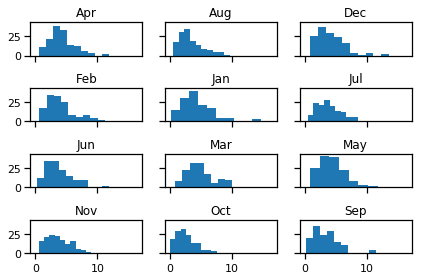

In [5]:
_ = precip.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

The first step is recognizing what sort of distribution to fit our data to. A couple of observations:

1. The data is *skewed*, with a longer tail to the right than to the left
2. The data is *positive-valued*, since they are measuring rainfall
3. The data is *continuous*

There are a few possible choices, but a good option is the [gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution). If $x$ measures rainfall:

<div style="font-size: 120%;">  
$$x \sim \gamma(\alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$
</div>


## 3. Data Cleansing 

Filling in the NA values for the month of October

In [6]:
precip.fillna(value={'Oct': precip.Oct.mean()}, inplace=True)
precip

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...
2007,3.32,1.84,2.26,2.75,3.30,2.37,1.47,1.38,1.99,4.95,6.20,3.83
2008,4.76,2.53,5.56,7.20,5.54,2.21,4.32,1.67,0.88,5.03,1.75,6.72
2009,4.59,2.85,2.92,4.13,8.45,4.53,6.03,2.14,11.08,6.49,0.67,3.99


## 4. Exploration

Calculating the **means** and **variances** of precipitation, month by month:

In [7]:
precip_mean = precip.mean()
precip_mean

Jan    4.523688
Feb    4.097801
Mar    4.977589
Apr    4.204468
May    4.325674
Jun    3.873475
Jul    3.895461
Aug    3.367305
Sep    3.377660
Oct    2.610500
Nov    3.685887
Dec    4.176241
dtype: float64

In [8]:
precip_var = precip.var()
precip_var

Jan    6.928862
Feb    5.516660
Mar    5.365444
Apr    4.117096
May    5.306409
Jun    5.033206
Jul    3.777012
Aug    3.779876
Sep    4.940099
Oct    2.741659
Nov    3.679274
Dec    5.418022
dtype: float64

In [9]:
precip.Apr

Year
1871     4.13
1872     5.91
1873     3.59
1874    11.84
1875     4.22
        ...  
2007     2.75
2008     7.20
2009     4.13
2010     3.48
2011     7.51
Name: Apr, Length: 141, dtype: float64

Moelling the parameters $\alpha$ and $\beta$ using the probability distributions.
Here modelling the rainfall for the month of **April**


C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


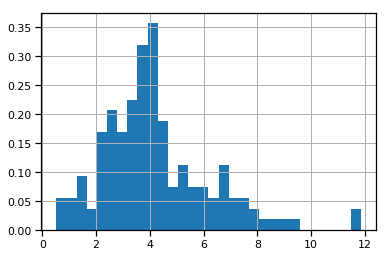

In [10]:
precip.Apr.hist(normed=True, bins=30)

### Exercise 1:

Starting with the `Uniform` distribution to model the $\alpha$ parameter for our gamma function. The Uniform distribution also needs start and end parameters. We pick them to be wide enough to match the data. Then we model april rainfall with the Gamme distribution.


In [14]:
from pymc3 import Model, Uniform

with Model() as rainfall_model:
    ualpha = Uniform('ualpha', lower=0, upper=15)
    ubeta = Uniform('ubeta', lower=0, upper=15)

In [12]:
from pymc3 import Gamma
with rainfall_model:
    april_like = Gamma('april_like', alpha=ualpha, beta=ubeta, observed=precip.Apr)

 Fitting the model using **variational inference**. Lets run the  probabilistic regression

In [13]:
from pymc3 import fit

with rainfall_model: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 368.14: 100%|██████████| 10000/10000 [00:09<00:00, 1006.68it/s]
Finished [100%]: Average Loss = 368


Plotting the **posterior probabilties**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


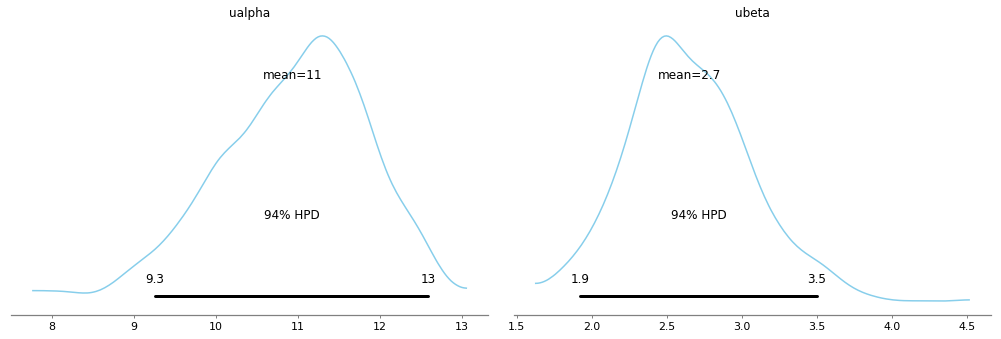

In [15]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ualpha', 'ubeta'],
                color='#87ceeb');

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


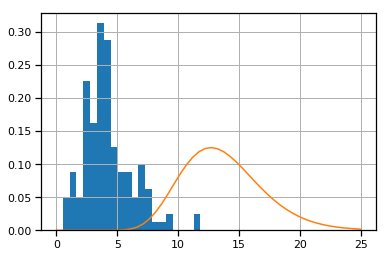

In [17]:
from scipy.stats.distributions import gamma

ualpha_posterior_mean = 11
ubeta_posterior_mean = 2.7

precip.Apr.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ualpha_posterior_mean, ubeta_posterior_mean))

### Exercise 2:

Trying out the `Normal` distribution .

What's the right support for the normal (the right mean and standard deviation)? Pick a mean that centers the gaussian around the peak of the month, and a standard deviation that allows the gaussian to cover all the data.

In [18]:
from pymc3 import Model, Normal

with Model() as rainfall_model_n:
    nalpha = Normal('nalpha', 4,sd=12)
    nbeta = Normal('nbeta', 4,sd=12)

In [19]:
from pymc3 import Gamma
with rainfall_model_n:
    april_like_n = Gamma('april_like_n', alpha=nalpha, beta=nbeta, observed=precip.Apr)

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\distributions\continuous.py:88: UserWarning: The variable specified for alpha has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)
C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\distributions\continuous.py:88: UserWarning: The variable specified for beta has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)


 Fitting the model using **variational inference**. Lets run the  probabilistic regression

In [20]:
from pymc3 import fit

with rainfall_model_n: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 327.67: 100%|██████████| 10000/10000 [00:10<00:00, 995.16it/s] 
Finished [100%]: Average Loss = 327.49


Plotting the **posterior probabilties**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


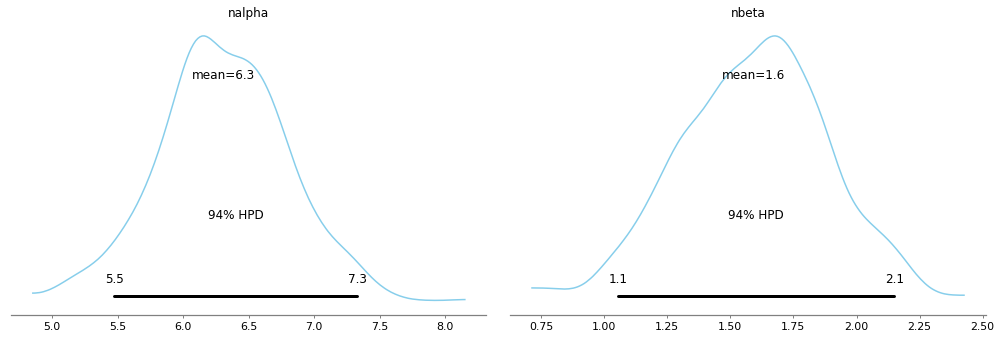

In [21]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['nalpha', 'nbeta'],
                color='#87ceeb');

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


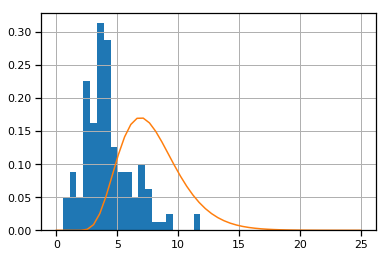

In [22]:
from scipy.stats.distributions import gamma

nalpha_posterior_mean = 6.3
nbeta_posterior_mean = 1.6

precip.Apr.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), nalpha_posterior_mean, nbeta_posterior_mean))

### Exercise 3: 
Trying the **exponential distribution** , instead to find the right number $x$ so that the distribution covers the range of possible precipitation values.  In other words, find the right value $y$ such that `Exponential.dist(1/3).random(size=10000)` covers from 0 to 12 for the month of April. Try different values out by plotting with:

```python
sns.distplot(Exponential.dist(1/3).random(size=10000), kde=False);
```


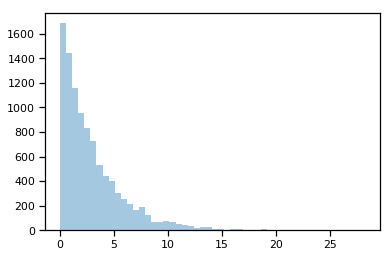

In [23]:
from pymc3 import Model, Exponential

sns.distplot(Exponential.dist(1/3).random(size=10000), kde=False);

In [24]:
from pymc3 import Model, Exponential

with Model() as rainfall_model_e:
    ealpha = Exponential('ealpha_minus_one', 1/2.)+1
    ebeta = Exponential('ebeta_minus_one', 1/2.)+1

In [25]:
from pymc3 import Gamma
with rainfall_model_e:
    april_like_exp = Gamma('april_like_exp', alpha=ealpha, beta=ebeta, observed=precip.Apr)

 Fitting the model using **variational inference**. Lets run the  probabilistic regression

In [26]:
from pymc3 import fit

with rainfall_model_e: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 313.57: 100%|██████████| 10000/10000 [00:08<00:00, 1153.01it/s]
Finished [100%]: Average Loss = 313.49


Plotting the **posterior probabilties**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


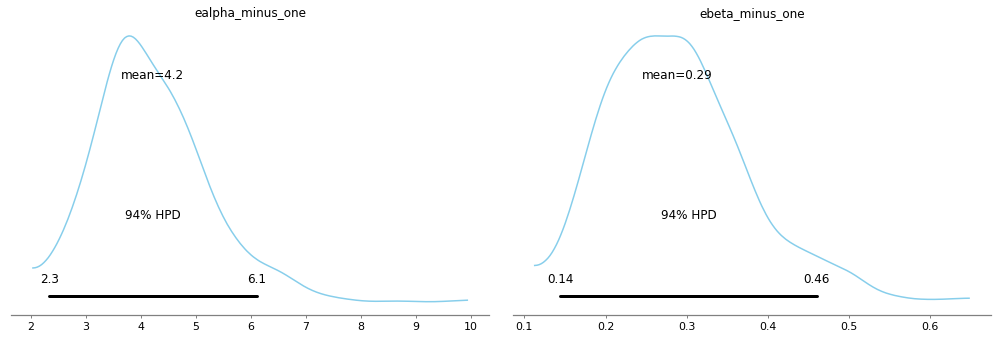

In [27]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ealpha_minus_one', 'ebeta_minus_one'],
                color='#87ceeb');

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


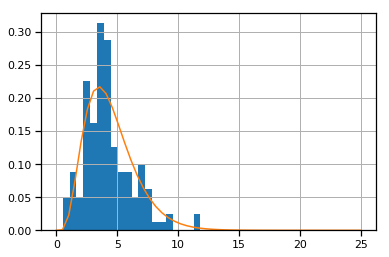

In [28]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean = 4.2
ebeta_posterior_mean = 0.29

precip.Apr.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ealpha_posterior_mean, ebeta_posterior_mean))

### Exercise 4:

Modelling for the month of **Janauary**

In [49]:
precip.Jan

Year
1871    2.76
1872    2.32
1873    2.96
1874    5.22
1875    6.15
        ... 
2007    3.32
2008    4.76
2009    4.59
2010    4.13
2011    2.31
Name: Jan, Length: 141, dtype: float64

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


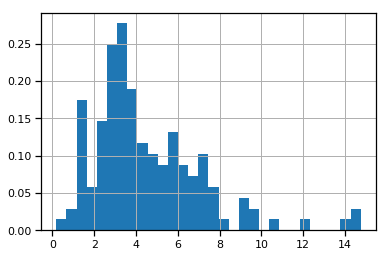

In [50]:
precip.Jan.hist(normed=True, bins=30)

In [64]:
from pymc3 import Model,Uniform
with Model() as rainfall_model_jan:
    ualpha_1 = Uniform('ualpha_1', lower=0, upper=14)
    ubeta_1 = Uniform('ubeta_1', lower=0, upper=14)



In [65]:
with rainfall_model_jan:
    jan_like = Gamma('jan_like', alpha=ualpha_1, beta=ubeta_1, observed=precip.Jan)

In [66]:
from pymc3 import fit

with rainfall_model_jan: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 420.75: 100%|██████████| 10000/10000 [00:08<00:00, 1213.07it/s]
Finished [100%]: Average Loss = 420.56


C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


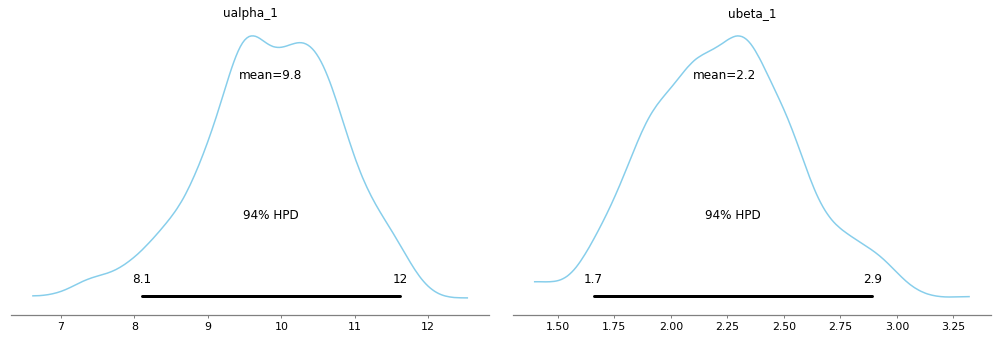

In [68]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ualpha_1', 'ubeta_1'],
                color='#87ceeb');

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


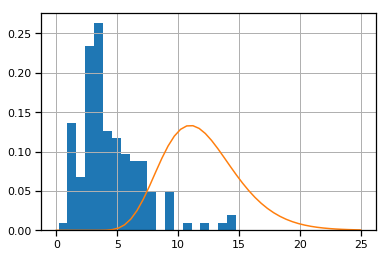

In [69]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean = 9.8
ebeta_posterior_mean = 2.2

precip.Jan.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ealpha_posterior_mean, ebeta_posterior_mean))

As the posterior does not match our histogram , lets try out **modelling the parameter with Exponential distribution** 


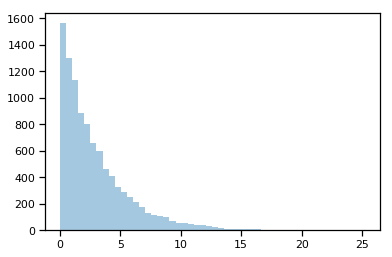

In [51]:
from pymc3 import Model, Exponential

sns.distplot(Exponential.dist(1/3).random(size=10000), kde=False);

In [52]:
from pymc3 import Model, Exponential

with Model() as rainfall_model_e:
    ealpha_jan = Exponential('ealpha_jan', 1/2.)+1
    ebeta_jan = Exponential('ebeta_jan', 1/2.)+1

In [53]:
from pymc3 import Gamma
with rainfall_model_e:
    jan_like_exp = Gamma('jan_like_exp', alpha=ealpha_jan, beta=ebeta_jan, observed=precip.Jan)

 Fitting the model using **variational inference**. Lets run the  probabilistic regression

In [54]:
from pymc3 import fit

with rainfall_model_e: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 349.9: 100%|██████████| 10000/10000 [00:08<00:00, 1249.67it/s]
Finished [100%]: Average Loss = 349.82


Plotting the **posterior probabilties**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


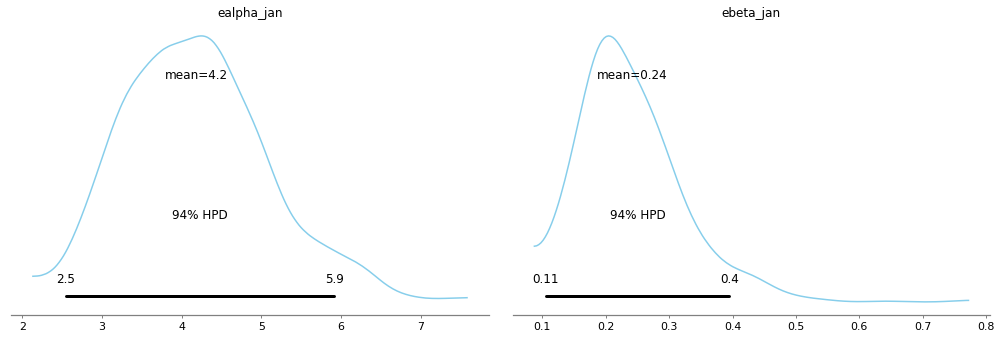

In [56]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ealpha_jan', 'ebeta_jan'],
                color='#87ceeb');

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


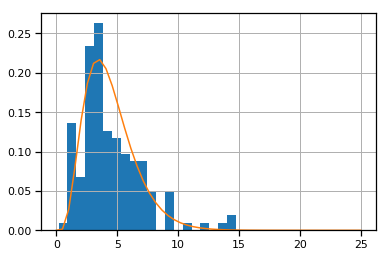

In [36]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean = 4.2
ebeta_posterior_mean = 0.24

precip.Jan.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ealpha_posterior_mean, ebeta_posterior_mean))

### (Deep thought) Exercise 5:

How would you model *all* months together (*one* model, *all* months)? Is that even possible?

Modelling the month of **February**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


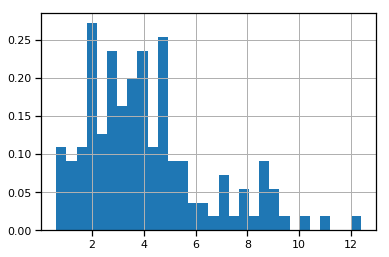

In [29]:
precip.Feb.hist(normed=True, bins=30)

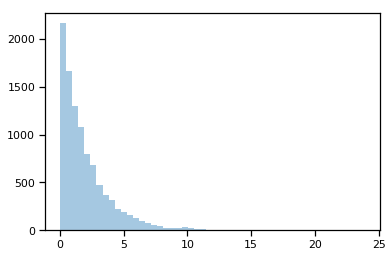

In [30]:
from pymc3 import Model, Exponential

sns.distplot(Exponential.dist(1/2).random(size=10000), kde=False);

In [43]:
from pymc3 import Model, Exponential

with Model() as rainfall_model_feb:
    ealpha_feb = Exponential('ealpha_feb', 1/2.)+1
    ebeta_feb = Exponential('ebeta_feb', 1/2.)+1

In [44]:
from pymc3 import Gamma
with rainfall_model_feb:
    feb_like_exp = Gamma('feb_like_exp', alpha=ealpha_feb, beta=ebeta_feb, observed=precip.Feb)

 Fitting the model using **variational inference**. Lets run the  probabilistic regression

In [45]:
from pymc3 import fit

with rainfall_model_feb: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 332.94: 100%|██████████| 10000/10000 [00:08<00:00, 1116.83it/s]
Finished [100%]: Average Loss = 332.87


Plotting the **posterior probabilties**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


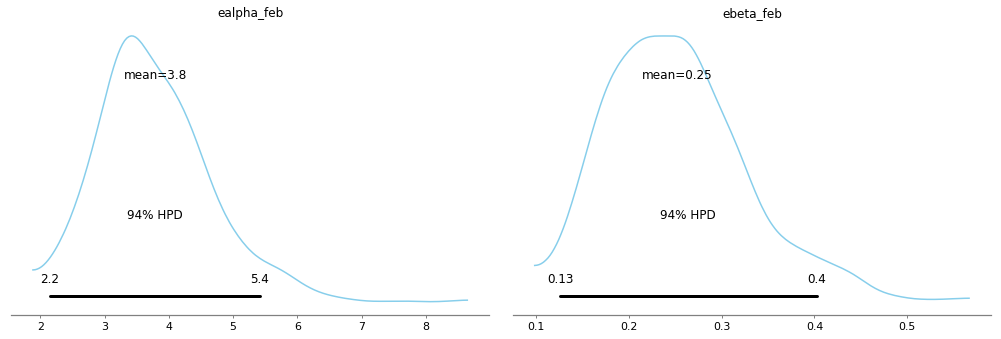

In [46]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ealpha_feb', 'ebeta_feb'],
                color='#87ceeb');

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


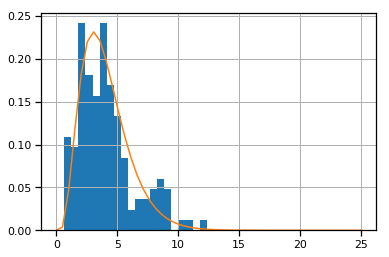

In [47]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean =3.8
ebeta_posterior_mean = 0.25

precip.Feb.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ealpha_posterior_mean, ebeta_posterior_mean))

**March**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


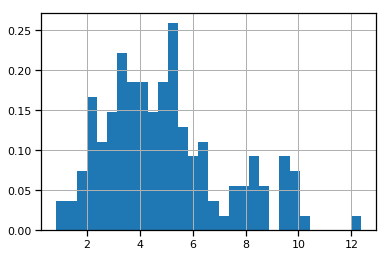

In [49]:
precip.Mar.hist(normed=True, bins=30)

In [56]:
from pymc3 import Model, Exponential

with Model() as rainfall_model_mar:
    ealpha_mar = Exponential('ealpha_mar', 1/3.)+1
    ebeta_mar = Exponential('ebeta_mar', 1/3.)+1

In [57]:
from pymc3 import Gamma
with rainfall_model_mar:
    mar_like_exp = Gamma('mar_like_exp', alpha=ealpha_mar, beta=ebeta_mar, observed=precip.Mar)

 Fitting the model using **variational inference**. Lets run the  probabilistic regression

In [58]:
from pymc3 import fit

with rainfall_model_mar: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 347.55: 100%|██████████| 10000/10000 [00:09<00:00, 1059.94it/s]
Finished [100%]: Average Loss = 347.41


Plotting the **posterior probabilties**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


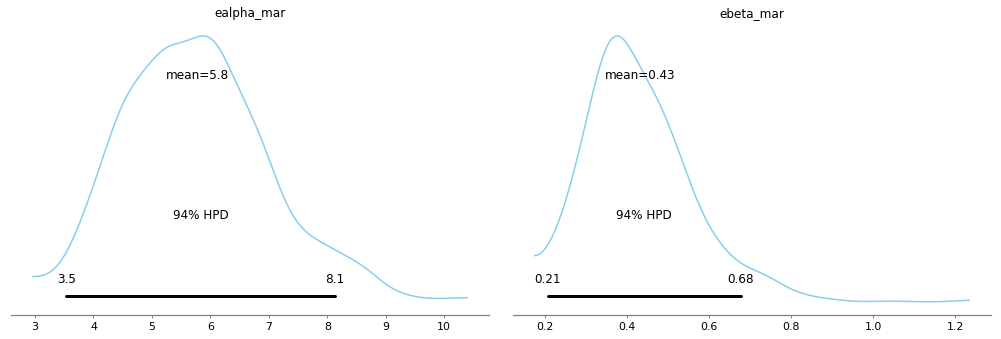

In [59]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ealpha_mar', 'ebeta_mar'],
                color='#87ceeb');

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


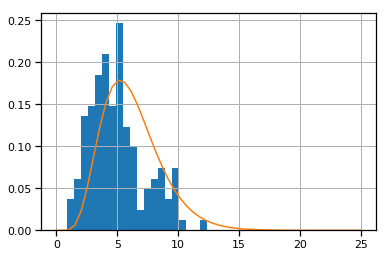

In [60]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean =5.8
ebeta_posterior_mean = 0.43

precip.Mar.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ealpha_posterior_mean, ebeta_posterior_mean))

**May**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


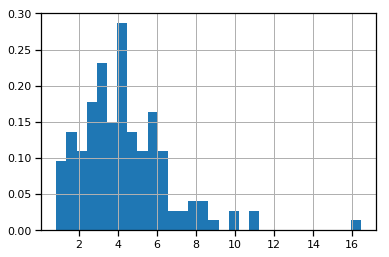

In [74]:
precip.May.hist(normed=True, bins=30)

In [75]:
from pymc3 import Model, Exponential

with Model() as rainfall_model_may:
    ealpha_may = Exponential('ealpha_may', 1/3.)+1
    ebeta_may = Exponential('ebeta_may', 1/3.)+1

In [76]:
from pymc3 import Gamma
with rainfall_model_may:
    may_like_exp = Gamma('may_like_exp', alpha=ealpha_may, beta=ebeta_may, observed=precip.May)

 Fitting the model using **variational inference**. Lets run the  probabilistic regression

In [77]:
from pymc3 import fit

with rainfall_model_may: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 333.41: 100%|██████████| 10000/10000 [00:08<00:00, 1132.30it/s]
Finished [100%]: Average Loss = 333.29


Plotting the **posterior probabilties**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


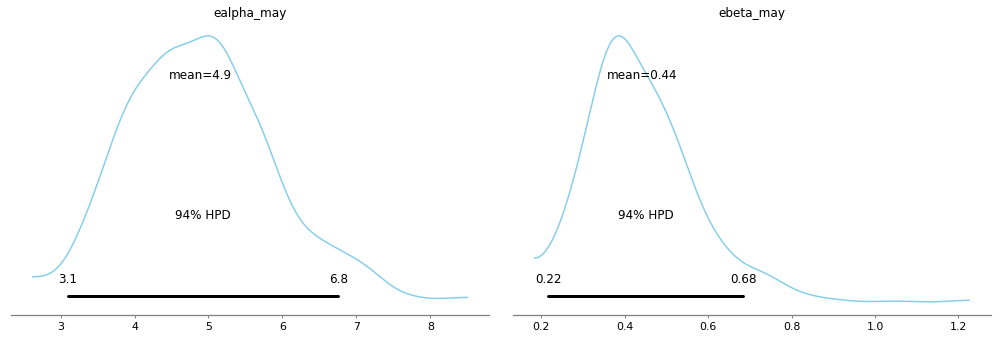

In [78]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ealpha_may', 'ebeta_may'],
                color='#87ceeb');

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


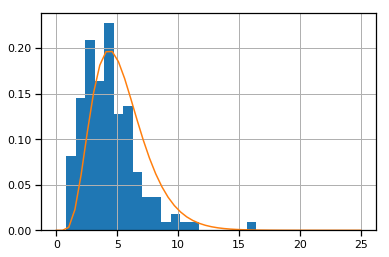

In [80]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean =4.9
ebeta_posterior_mean = 0.44

precip.May.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ealpha_posterior_mean, ebeta_posterior_mean))

**June**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


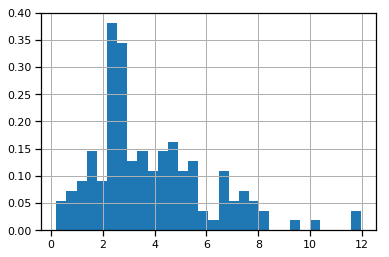

In [81]:
precip.Jun.hist(normed=True, bins=30)

In [103]:
from pymc3 import Model, Exponential

with Model() as rainfall_model_jun:
    ealpha_jun = Exponential('ealpha_jun', 1/2.)+1
    ebeta_jun = Exponential('ebeta_jun', 1/2.)+1

In [104]:
from pymc3 import Gamma
with rainfall_model_jun:
    jun_like_exp = Gamma('jun_like_exp', alpha=ealpha_jun, beta=ebeta_jun, observed=precip.Jun)

 Fitting the model using **variational inference**. Lets run the  probabilistic regression

In [105]:
from pymc3 import fit

with rainfall_model_jun: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 325.7: 100%|██████████| 10000/10000 [00:08<00:00, 1217.87it/s]
Finished [100%]: Average Loss = 325.63


Plotting the **posterior probabilties**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


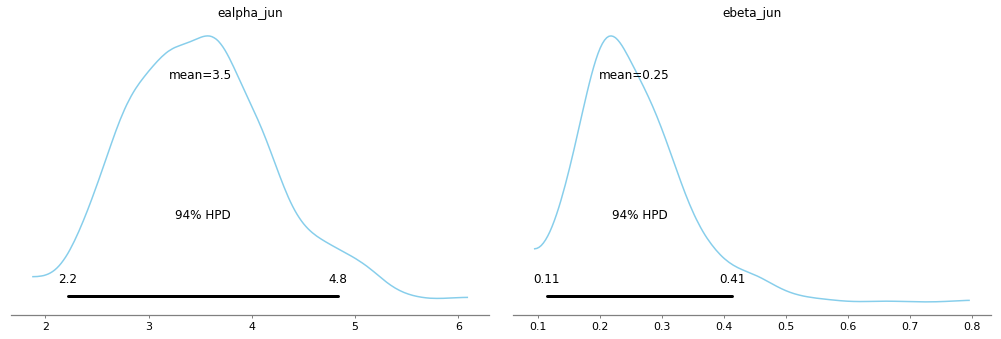

In [106]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ealpha_jun', 'ebeta_jun'],
                color='#87ceeb');

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


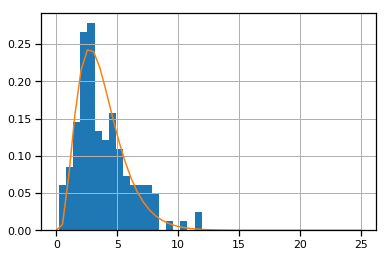

In [107]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean =3.5
ebeta_posterior_mean = 0.25

precip.Jun.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ealpha_posterior_mean, ebeta_posterior_mean))

**July**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


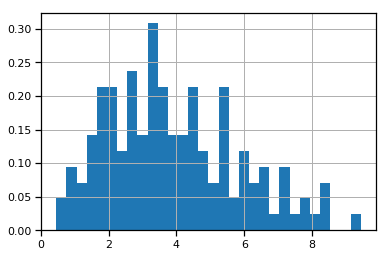

In [108]:
precip.Jul.hist(normed=True, bins=30)

In [109]:
from pymc3 import Model, Exponential

with Model() as rainfall_model_jul:
    ealpha_jul = Exponential('ealpha_jul', 1/2.)+1
    ebeta_jul = Exponential('ebeta_jul', 1/2.)+1

In [110]:
from pymc3 import Gamma
with rainfall_model_jul:
    jul_like_exp = Gamma('jul_like_exp', alpha=ealpha_jul, beta=ebeta_jul, observed=precip.Jul)

 Fitting the model using **variational inference**. Lets run the  probabilistic regression

In [111]:
from pymc3 import fit

with rainfall_model_jul: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 309.55: 100%|██████████| 10000/10000 [00:08<00:00, 1224.51it/s]
Finished [100%]: Average Loss = 309.48


Plotting the **posterior probabilties**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


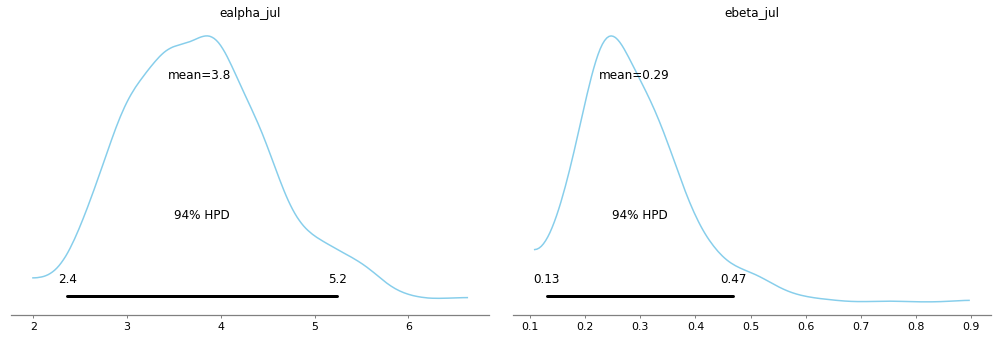

In [112]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ealpha_jul', 'ebeta_jul'],
                color='#87ceeb');

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


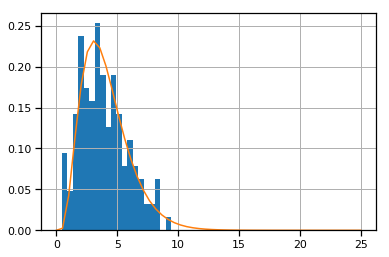

In [113]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean =3.8
ebeta_posterior_mean = 0.29

precip.Jul.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ealpha_posterior_mean, ebeta_posterior_mean))

**August**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


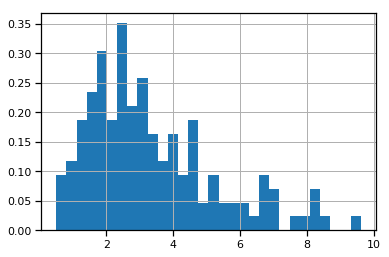

In [114]:
precip.Aug.hist(normed=True, bins=30)

In [118]:
from pymc3 import Model, Exponential

with Model() as rainfall_model_aug:
    ealpha_aug = Exponential('ealpha_aug', 1/2.)+1
    ebeta_aug = Exponential('ebeta_aug', 1/2.)+1

In [119]:
from pymc3 import Gamma
with rainfall_model_aug:
    aug_like_exp = Gamma('aug_like_exp', alpha=ealpha_aug, beta=ebeta_aug, observed=precip.Aug)

 Fitting the model using **variational inference**. Lets run the  probabilistic regression

In [120]:
from pymc3 import fit

with rainfall_model_aug: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 293.17: 100%|██████████| 10000/10000 [00:07<00:00, 1359.85it/s]
Finished [100%]: Average Loss = 293.11


Plotting the **posterior probabilties**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


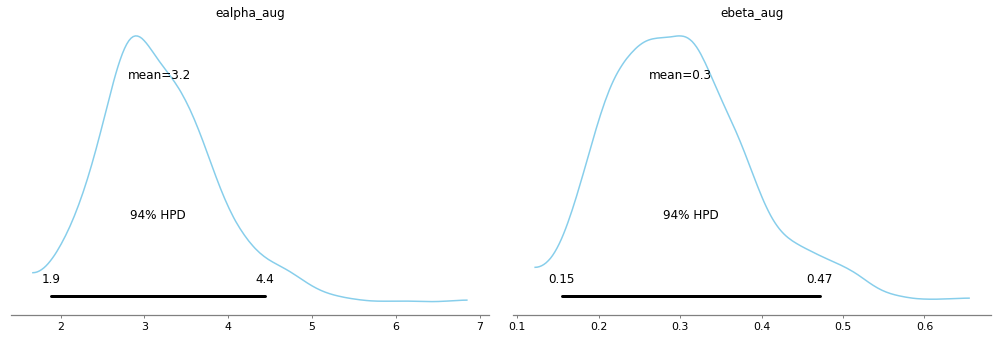

In [121]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ealpha_aug', 'ebeta_aug'],
                color='#87ceeb');

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


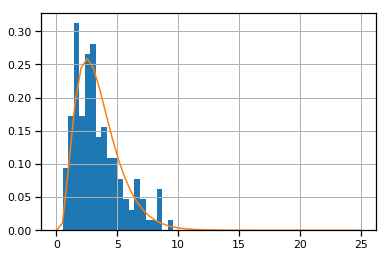

In [123]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean =3.2
ebeta_posterior_mean = 0.3

precip.Aug.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ealpha_posterior_mean, ebeta_posterior_mean))

**September**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


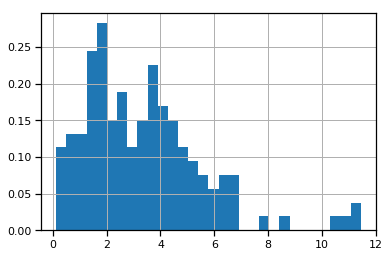

In [124]:
precip.Sep.hist(normed=True, bins=30)

In [144]:
from pymc3 import Model, Exponential

with Model() as rainfall_model_sep:
    ealpha_sep = Exponential('ealpha_sep', 1/3.)+1
    ebeta_sep = Exponential('ebeta_sep', 1/4.)+1

In [145]:
from pymc3 import Gamma
with rainfall_model_sep:
    sep_like_exp = Gamma('sep_like_exp', alpha=ealpha_sep, beta=ebeta_sep, observed=precip.Sep)

 Fitting the model using **variational inference**. Lets run the  probabilistic regression

In [146]:
from pymc3 import fit

with rainfall_model_sep: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 343.32: 100%|██████████| 10000/10000 [00:07<00:00, 1415.07it/s]
Finished [100%]: Average Loss = 343.19


Plotting the **posterior probabilties**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


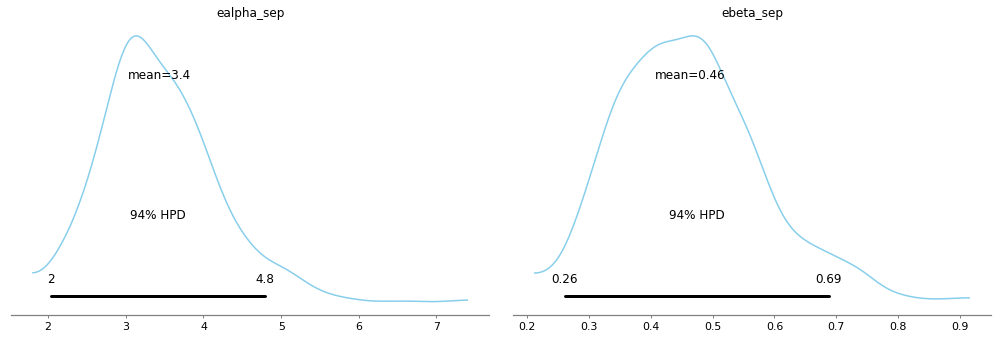

In [147]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ealpha_sep', 'ebeta_sep'],
                color='#87ceeb');

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


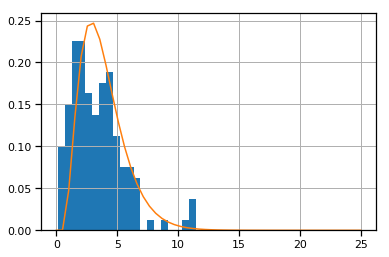

In [148]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean =3.4
ebeta_posterior_mean = 0.46

precip.Sep.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ealpha_posterior_mean, ebeta_posterior_mean))

In [ ]:
**October**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


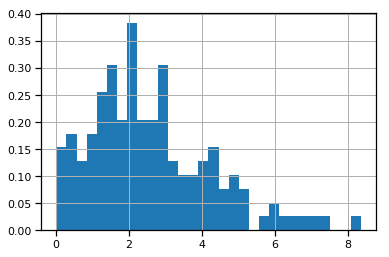

In [195]:
precip.Oct.hist(normed=True, bins=30)

In [196]:
from pymc3 import Model, Exponential

with Model() as rainfall_model_oct:
    ealpha_oct = Exponential('ealpha_oct', 1/3.)+1
    ebeta_oct = Exponential('ebeta_oct', 1/4.)+1

In [197]:
from pymc3 import Gamma
with rainfall_model_oct:
    oct_like_exp = Gamma('oct_like_exp', alpha=ealpha_oct, beta=ebeta_oct, observed=precip.Oct)

 Fitting the model using **variational inference**. Lets run the  probabilistic regression

In [198]:
from pymc3 import fit

with rainfall_model_oct: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 294.41: 100%|██████████| 10000/10000 [00:07<00:00, 1394.26it/s]
Finished [100%]: Average Loss = 294.32


Plotting the **posterior probabilties**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


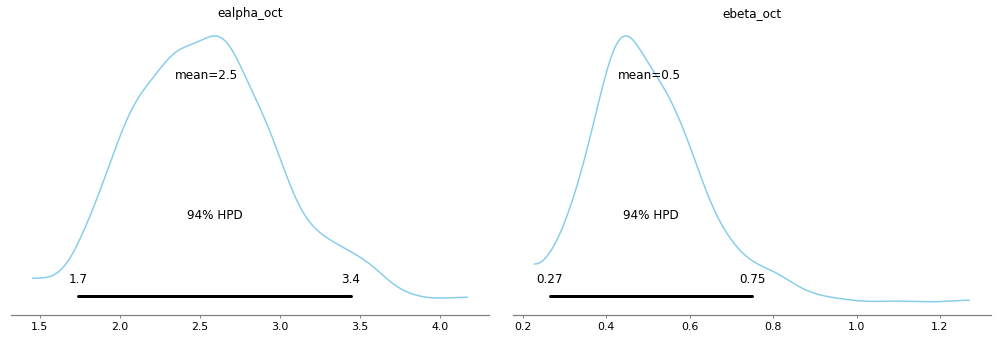

In [199]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ealpha_oct', 'ebeta_oct'],
                color='#87ceeb');

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


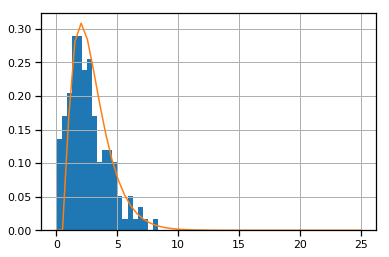

In [200]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean =2.5
ebeta_posterior_mean = 0.5

precip.Oct.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ealpha_posterior_mean, ebeta_posterior_mean))

**November**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


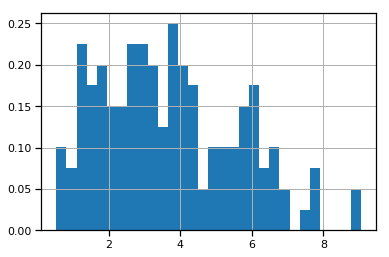

In [163]:
precip.Nov.hist(normed=True, bins=30)

In [178]:
from pymc3 import Model, Exponential

with Model() as rainfall_model_nov:
    ealpha_nov = Exponential('ealpha_nov', 1/3.)+1
    ebeta_nov = Exponential('ebeta_nov', 1/3.)+1

In [179]:
from pymc3 import Gamma
with rainfall_model_nov:
    nov_like_exp = Gamma('nov_like_exp', alpha=ealpha_nov, beta=ebeta_nov, observed=precip.Nov)

 Fitting the model using **variational inference**. Lets run the  probabilistic regression

In [180]:
from pymc3 import fit

with rainfall_model_nov: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 313.12: 100%|██████████| 10000/10000 [00:06<00:00, 1552.64it/s]
Finished [100%]: Average Loss = 313.02


Plotting the **posterior probabilties**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


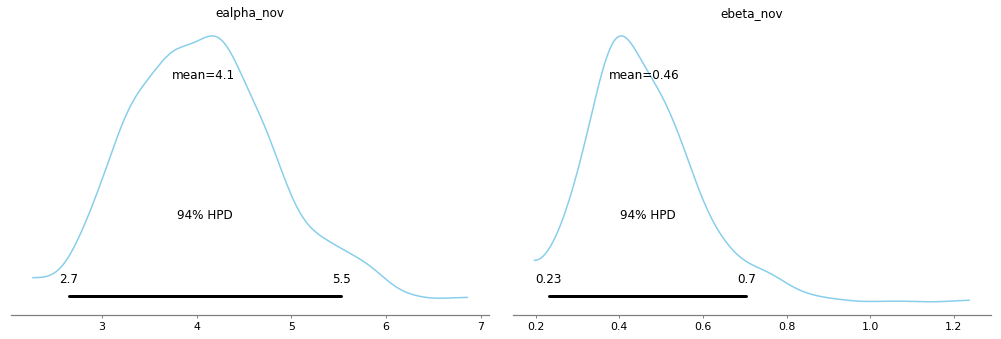

In [181]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ealpha_nov', 'ebeta_nov'],
                color='#87ceeb');

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


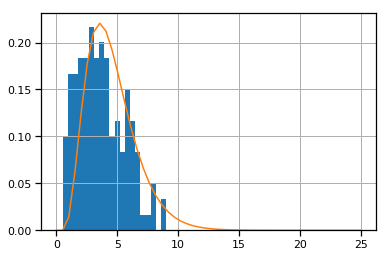

In [182]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean =4.1
ebeta_posterior_mean = 0.46

precip.Nov.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ealpha_posterior_mean, ebeta_posterior_mean))

**December**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


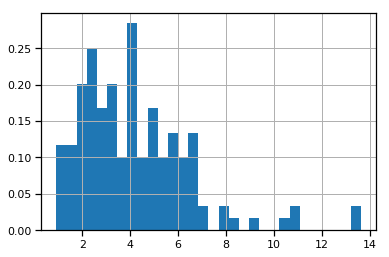

In [183]:
precip.Dec.hist(normed=True, bins=30)

In [227]:
from pymc3 import Model, Exponential

with Model() as rainfall_model_dec:
    ealpha_dec = Exponential('ealpha_dec', 1/1.)+1
    ebeta_dec = Exponential('ebeta_dec', 1/3.5)+1

In [228]:
from pymc3 import Gamma
with rainfall_model_dec:
    dec_like_exp = Gamma('dec_like_exp', alpha=ealpha_dec, beta=ebeta_dec, observed=precip.Dec)

 Fitting the model using **variational inference**. Lets run the  probabilistic regression

In [229]:
from pymc3 import fit

with rainfall_model_dec: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 356.48: 100%|██████████| 10000/10000 [00:07<00:00, 1313.08it/s]
Finished [100%]: Average Loss = 356.39


Plotting the **posterior probabilties**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


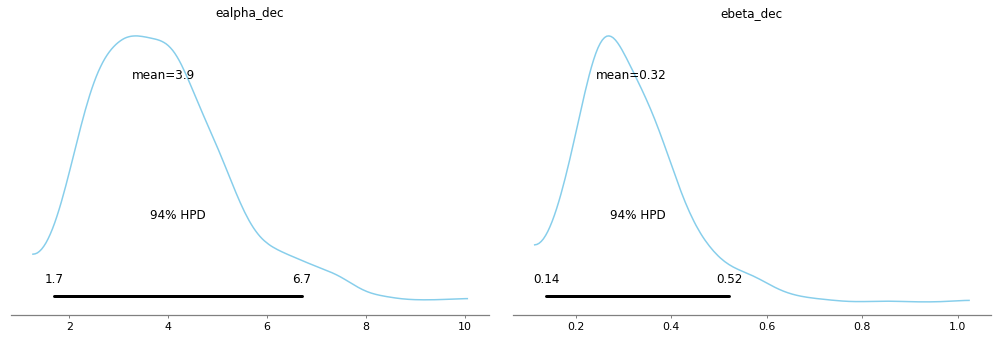

In [230]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ealpha_dec', 'ebeta_dec'],
                color='#87ceeb');

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


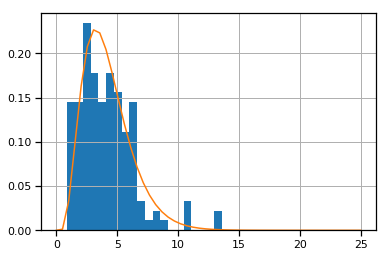

In [231]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean =3.9
ebeta_posterior_mean = 0.32

precip.Dec.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ealpha_posterior_mean, ebeta_posterior_mean))

Plotted the posteriors for all the 12 months above

In [232]:
# We could take the mean of all months rainfall and model it. Introducing a new attribute for the average.
precip['avg'] = precip.mean(axis=1)
precip.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,avg
Year,,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65,2.728333
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38,3.350000
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94,4.307500
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19,4.853333
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30,4.454167


In [233]:
precip.avg

Year
1871    2.728333
1872    3.350000
1873    4.307500
1874    4.853333
1875    4.454167
          ...   
2007    2.971667
2008    4.014167
2009    4.822500
2010    4.923333
2011    4.345000
Name: avg, Length: 141, dtype: float64

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


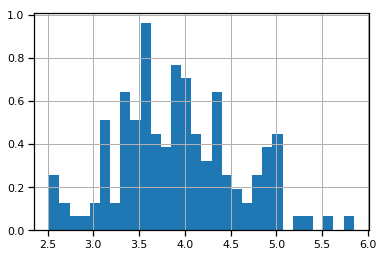

In [240]:
precip.avg.hist(normed=True, bins=30)

In [252]:
from pymc3 import Model, Exponential

with Model() as rainfall_model_avg:
    ealpha_avg = Exponential('ealpha_avg', 1/1.)+1
    ebeta_avg = Exponential('ebeta_avg', 1/2.)+1

In [253]:
from pymc3 import Gamma
with rainfall_model_avg:
    avg_like_exp = Gamma('avg_like_exp', alpha=ealpha_avg, beta=ebeta_avg, observed=precip.avg)

 Fitting the model using **variational inference**. Lets run the  probabilistic regression

In [254]:
from pymc3 import fit

with rainfall_model_avg: 
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 261.53: 100%|██████████| 10000/10000 [00:07<00:00, 1320.12it/s]
Finished [100%]: Average Loss = 261.41


Plotting the **posterior probabilties**

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


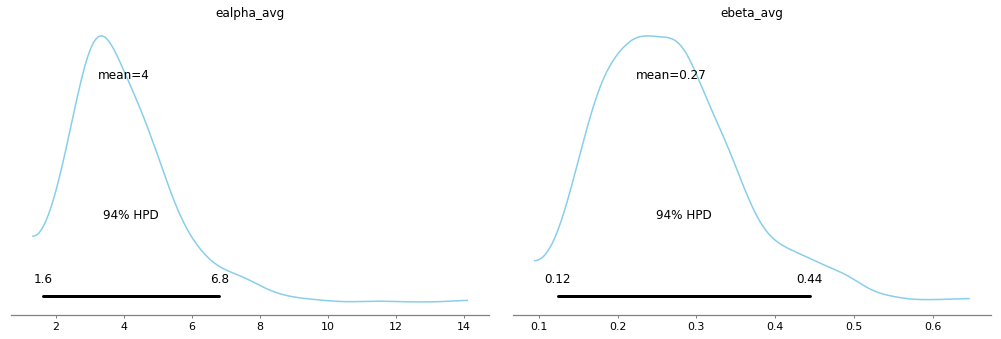

In [255]:
from pymc3 import plot_posterior

plot_posterior(rainfall_trace[100:], 
                varnames=['ealpha_avg', 'ebeta_avg'],
                color='#87ceeb');

C:\Users\Harika\Anaconda2\envs\theano3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


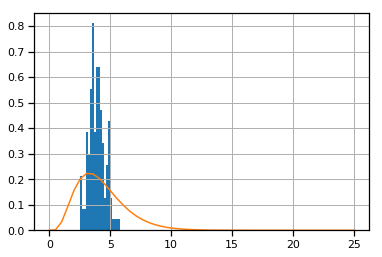

In [256]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean =4
ebeta_posterior_mean = 0.27

precip.avg.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ealpha_posterior_mean, ebeta_posterior_mean))